# Análise Exploratória - Dados Brutos (RAW)
## Sinistros de Trânsito 2025

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

print("✅ Bibliotecas carregadas com sucesso!")

✅ Bibliotecas importadas com sucesso!


In [ ]:
df = pd.read_csv('datatran2025.csv', sep=';', encoding='latin-1')
print(f"Dataset carregado: {len(df):,} registros | {len(df.columns)} variáveis")

✅ Dados carregados: 65683 linhas e 30 colunas


In [ ]:
df.head()

,id,data_inversa,dia_semana,horario,uf,br,km,municipio,causa_acidente,tipo_acidente,...,feridos_graves,ilesos,ignorados,feridos,veiculos,latitude,longitude,regional,delegacia,uop
0,652493,2025-01-01,quarta-feira,06:20:00,SP,116,225,GUARULHOS,Reação tardia ou ineficiente do condutor,Tombamento,...,0,0,1,1,2,"-23,48586772","-46,54075317",SPRF-SP,DEL01-SP,UOP01-DEL01-SP
1,652519,2025-01-01,quarta-feira,07:50:00,CE,116,"546,2",PENAFORTE,Pista esburacada,Colisão frontal,...,0,1,4,1,6,"-7,812288","-39,08333306",SPRF-CE,DEL05-CE,UOP03-DEL05-CE
2,652522,2025-01-01,quarta-feira,08:45:00,PR,369,"88,2",CORNELIO PROCOPIO,Reação tardia ou ineficiente do condutor,Colisão traseira,...,0,2,0,3,2,"-23,182565","-50,637228",SPRF-PR,DEL07-PR,UOP05-DEL07-PR
3,652544,2025-01-01,quarta-feira,11:00:00,PR,116,74,CAMPINA GRANDE DO SUL,Reação tardia ou ineficiente do condutor,Saída de leito carroçável,...,0,4,0,1,2,"-25,36517687","-49,04223028",SPRF-PR,DEL01-PR,UOP02-DEL01-PR
4,652549,2025-01-01,quarta-feira,09:30:00,MG,251,471,FRANCISCO SA,Velocidade Incompatível,Colisão frontal,...,1,1,2,2,4,"-16,46801304","-43,43121303",SPRF-MG,DEL12-MG,UOP01-DEL12-MG


In [ ]:
print("=" * 60)
print("PANORAMA GERAL DE VÍTIMAS")
print("=" * 60)
print(f"Pessoas envolvidas nos acidentes: {df['pessoas'].sum():,}")
print(f"Óbitos: {df['mortos'].sum():,}")
print(f"Feridos (leves + graves): {df['feridos'].sum():,}")
print(f"Ilesos: {df['ilesos'].sum():,}")
print(f"\nÍndice de letalidade: {(df['mortos'].sum() / df['pessoas'].sum() * 100):.2f}%")

RESUMO DE VÍTIMAS
Total de pessoas envolvidas: 170,009
Total de mortos: 5,466
Total de feridos: 75,378
Total de ilesos: 68,842
Taxa de letalidade: 3.22%


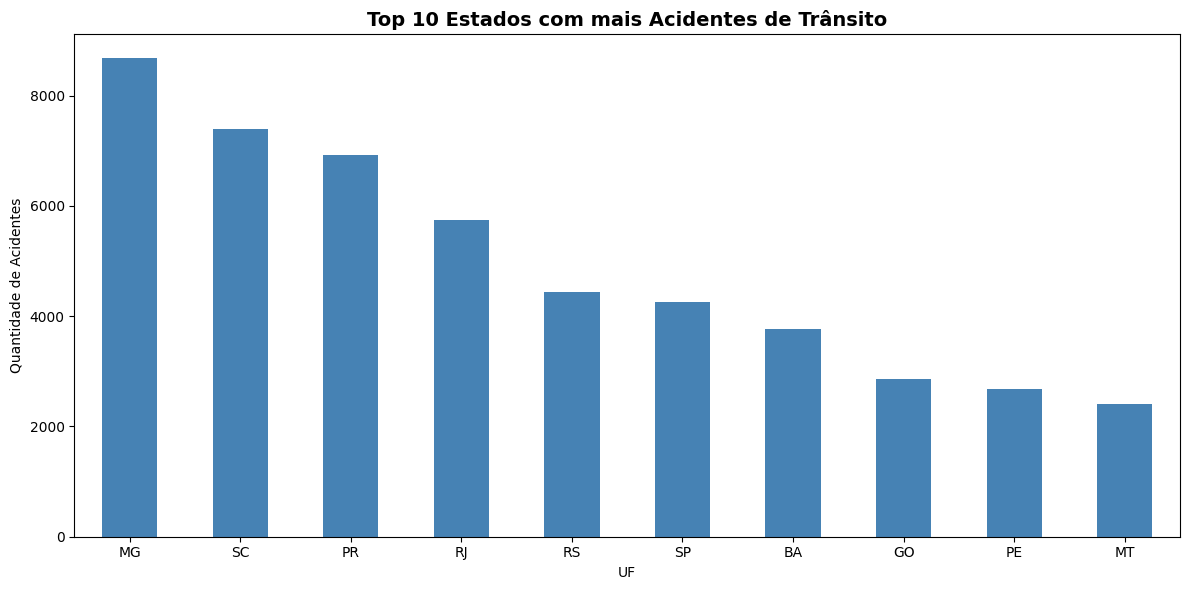

In [ ]:
plt.figure(figsize=(12, 6))
df['uf'].value_counts().head(10).plot(kind='bar', color='#2E86AB', edgecolor='black')
plt.title('Estados com Maior Incidência de Acidentes', fontsize=15, fontweight='bold', pad=20)
plt.xlabel('Unidade Federativa', fontsize=12)
plt.ylabel('Número de Acidentes', fontsize=12)
plt.xticks(rotation=0)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

In [ ]:
duplicados = df.duplicated().sum()
print(f"Registros duplicados encontrados: {duplicados}")

Total de linhas duplicadas: 0


In [ ]:
print("=" * 60)
print("ANÁLISE DE VALORES AUSENTES")
print("=" * 60)
nulos = df.isnull().sum()
print(nulos[nulos > 0].sort_values(ascending=False))

VALORES NULOS POR COLUNA
uop                       36
delegacia                 22
regional                   2
classificacao_acidente     1
dtype: int64


In [ ]:
df.describe()

,id,br,pessoas,mortos,feridos_leves,feridos_graves,ilesos,ignorados,feridos,veiculos
count,65683.000000,65683.000000,65683.000000,65683.000000,65683.000000,65683.000000,65683.000000,65683.000000,65683.000000,65683.000000
mean,696761.677862,208.671330,2.588326,0.083218,0.871352,0.276251,1.048095,0.398216,1.147603,2.004598
std,25016.099498,128.539676,2.213321,0.337174,1.030849,0.612070,1.789929,0.874430,1.139584,1.137783
min,652468.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,670880.500000,101.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
50%,700133.000000,156.000000,2.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,2.000000
75%,718037.500000,319.000000,3.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,2.000000
max,740243.000000,495.000000,76.000000,16.000000,41.000000,22.000000,71.000000,81.000000,49.000000,82.000000


In [ ]:
print("=" * 60)
print("ESTRUTURA DO DATASET")
print("=" * 60)
df.info()

INFORMAÇÕES GERAIS DO DATASET
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65683 entries, 0 to 65682
Data columns (total 30 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   id                      65683 non-null  int64 
 1   data_inversa            65683 non-null  object
 2   dia_semana              65683 non-null  object
 3   horario                 65683 non-null  object
 4   uf                      65683 non-null  object
 5   br                      65683 non-null  int64 
 6   km                      65683 non-null  object
 7   municipio               65683 non-null  object
 8   causa_acidente          65683 non-null  object
 9   tipo_acidente           65683 non-null  object
 10  classificacao_acidente  65682 non-null  object
 11  fase_dia                65683 non-null  object
 12  sentido_via             65683 non-null  object
 13  condicao_metereologica  65683 non-null  object
 14  tipo_pista              